In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from functools import reduce
import pickle
from utils.Python_Connectivity.src.BIAPT_Connectivity_parallel import connectivity_compute
import mne_connectivity
import mne
import os
import seaborn as sns

In [2]:
SUB = 'sub-xxxYY'
TASK = 'sedoff'
output_dir = f'RESULTS/{SUB}_Python/{TASK}'
input_dir = 'BIDS_testdata/'
data_format =  'set'

# define parameters:
l_freq = 7
h_freq = 13
window_length = 10
step_size = 10

In [3]:
if not os.path.exists(output_dir):
        os.makedirs(output_dir)


In [4]:
def filter_matrix(data, row, col):
    filtered = data[row,:]
    filtered = filtered[:,col]
    return filtered

In [5]:
def plot_wPLI(wPLI, channels, hemisphere, maxval):
    fig = plt.figure(figsize=(12, 10))

    ax = fig.add_subplot(111)

    mgroup = np.array(ch_order.iloc[channels]['Region'])
    
    if hemisphere == 'Left':
        grouping = [np.count_nonzero(mgroup == 'FL'),
                    np.count_nonzero(mgroup == 'CL'),
                    np.count_nonzero(mgroup == 'PL'),
                    np.count_nonzero(mgroup == 'OL'),
                    np.count_nonzero(mgroup == 'TL')
                    ]
        
    if hemisphere == 'Right':
        grouping = [np.count_nonzero(mgroup == 'FR'),
                    np.count_nonzero(mgroup == 'CR'),
                    np.count_nonzero(mgroup == 'PR'),
                    np.count_nonzero(mgroup == 'OR'),
                    np.count_nonzero(mgroup == 'TR')
                    ]
        

    colors = ['dodgerblue', 'orange', 'forestgreen', 'darkseagreen', 'grey']
    labels = ['F', 'C', 'P', 'O', 'T']
    
    sns.heatmap(wPLI, cmap='jet', vmin=0, vmax=maxval, yticklabels = [],xticklabels = [], ax = ax)
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=20)
    
    for width, pos, color, label in zip(grouping, np.cumsum([0] + grouping), colors, labels):
        ax.add_patch(plt.Rectangle((pos, -0.1), width, 0.1, color=color,
                                   clip_on=False, transform=ax.get_xaxis_transform()))

        ax.add_patch(plt.Rectangle((-0.1, pos), 0.1, width, color=color,
                                   clip_on=False, transform=ax.get_yaxis_transform()))

        ax.text(-0.15, pos + width/2, label, ha='right', va='center', clip_on=False,
                transform=ax.get_yaxis_transform(), fontsize  = 30)

In [6]:
def plot_dPLI(dPLI, channels, hemisphere, maxval):
    fig = plt.figure(figsize=(12, 10))

    ax = fig.add_subplot(111)

    mgroup = np.array(ch_order.iloc[channels]['Region'])
    
    if hemisphere == 'Left':
        grouping = [np.count_nonzero(mgroup == 'FL'),
                    np.count_nonzero(mgroup == 'CL'),
                    np.count_nonzero(mgroup == 'PL'),
                    np.count_nonzero(mgroup == 'OL'),
                    np.count_nonzero(mgroup == 'TL')
                    ]
        
    if hemisphere == 'Right':
        grouping = [np.count_nonzero(mgroup == 'FR'),
                    np.count_nonzero(mgroup == 'CR'),
                    np.count_nonzero(mgroup == 'PR'),
                    np.count_nonzero(mgroup == 'OR'),
                    np.count_nonzero(mgroup == 'TR')
                    ]
        

    colors = ['dodgerblue', 'orange', 'forestgreen', 'darkseagreen', 'grey']
    labels = ['F', 'C', 'P', 'O', 'T']
    
    minval = 0.5-(maxval-0.5)

    sns.heatmap(dPLI, cmap='jet', vmin=minval, vmax=maxval, yticklabels = [],xticklabels = [], ax = ax)
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=20)
    
    for width, pos, color, label in zip(grouping, np.cumsum([0] + grouping), colors, labels):
        ax.add_patch(plt.Rectangle((pos, -0.1), width, 0.1, color=color,
                                   clip_on=False, transform=ax.get_xaxis_transform()))

        ax.add_patch(plt.Rectangle((-0.1, pos), 0.1, width, color=color,
                                   clip_on=False, transform=ax.get_yaxis_transform()))

        ax.text(-0.15, pos + width/2, label, ha='right', va='center', clip_on=False,
                transform=ax.get_yaxis_transform(), fontsize  = 30)

In [7]:
# load epoch data 
if data_format == 'fif':
    input_fname = f"{input_dir}/{SUB}/eeg/{SUB}_task-{TASK}_eeg.fif"
    epochs = mne.read_epochs(input_fname)

if data_format == 'set':
    input_fname = f"{input_dir}/{SUB}/eeg/{SUB}_task-{TASK}_eeg.set"
    data = mne.io.read_raw_eeglab(input_fname)
    if len(data.get_data().shape) == 2:
        # split data into non-overlaping 10 s windows ()
        epochs = mne.make_fixed_length_epochs(data, duration=10, preload=True)


Reading /Users/charlotte/Documents/GitHub/NET_ICU/BIDS_testdata/sub-xxxYY/eeg/sub-xxxYY_task-sedoff_eeg.fdt
Not setting metadata
6 matching events found
No baseline correction applied
0 projection items activated
Loading data for 6 events and 2500 original time points ...
0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows


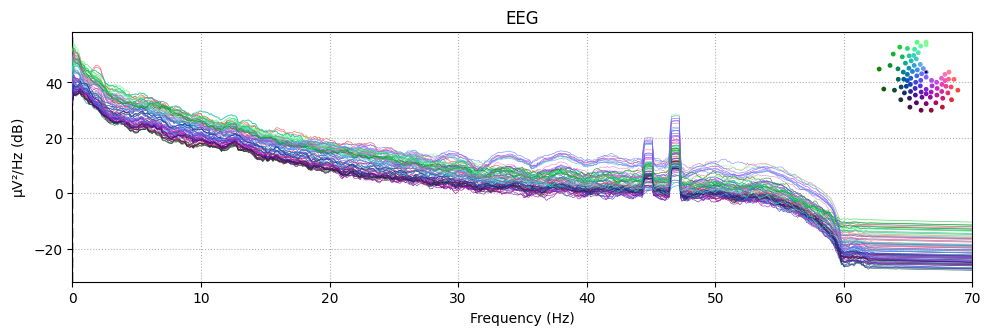

<Figure size 640x480 with 0 Axes>

In [8]:
epochs.plot_psd(fmax=70, exclude = ['E129'])
plt.savefig(f'{output_dir}/Power_{SUB}_{TASK}.jpeg')

In [9]:
sfreq = int(data.info['sfreq'])
conc_data = np.concatenate(list(epochs), axis=1)

# 20 surrogates
wpli = connectivity_compute(conc_data, window_length, step_size, l_freq,
                                          h_freq, sfreq, n_surrogates=20, mode="wpli",
                                          )
# 20 surrogates
dpli = connectivity_compute(conc_data, window_length, step_size, l_freq,
                                          h_freq, sfreq, n_surrogates=20, mode="dpli",
                                          )



Computing on window 2/6
Computing on window 4/6
Computing on window 5/6
Computing on window 3/6
Computing on window 6/6
Computing on window 1/6


/Users/charlotte/.pyenv/versions/3.8.12/lib/python3.8/site-packages/scipy/stats/_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/charlotte/.pyenv/versions/3.8.12/lib/python3.8/site-packages/scipy/stats/_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/charlotte/.pyenv/versions/3.8.12/lib/python3.8/site-packages/scipy/stats/_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/charlotte/.pyenv/versions/3.8.12/lib/python3.8/site-packages/scipy/stats/_morestats.py:3255: UserWarning: Exact p-value calculation does not work if ther

Computing on window 3/6
Computing on window 1/6
Computing on window 2/6
Computing on window 4/6
Computing on window 5/6
Computing on window 6/6


/Users/charlotte/.pyenv/versions/3.8.12/lib/python3.8/site-packages/scipy/stats/_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/charlotte/.pyenv/versions/3.8.12/lib/python3.8/site-packages/scipy/stats/_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/charlotte/.pyenv/versions/3.8.12/lib/python3.8/site-packages/scipy/stats/_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/charlotte/.pyenv/versions/3.8.12/lib/python3.8/site-packages/scipy/stats/_morestats.py:3255: UserWarning: Exact p-value calculation does not work if ther

In [10]:
ch_order = pd.read_csv("utils/channel_region.txt", sep='\t')

# filter existing channels
exist = ch_order['Name'].isin(data.info['ch_names'])
ch_order = ch_order[exist]

# make translational array
transl = []
for i in ch_order['Name']:
    transl.append(np.where(i == np.array(data.info['ch_names']))[0][0])

In [11]:
# average metrices over time
wPLI = np.mean(wpli,axis =0)
dPLI = np.mean(dpli,axis =0)

In [12]:
left = np.where(ch_order['Hemisphere']=='L')[0]
right = np.where(ch_order['Hemisphere']=='R')[0]

In [13]:
wPLI_reordered = filter_matrix(wPLI, transl, transl)
dPLI_reordered = filter_matrix(dPLI, transl, transl)

# left
wPLI_left = filter_matrix(wPLI_reordered, left, left)
dPLI_left = filter_matrix(dPLI_reordered, left, left)
# right
wPLI_right = filter_matrix(wPLI_reordered, right,right)
dPLI_right = filter_matrix(dPLI_reordered, right,right)

In [14]:
plot_wPLI(wPLI_right, right, 'Right',0.2)
plt.savefig(f'{output_dir}/wPLI_{SUB}_{TASK}_right.jpeg')


In [15]:
plot_wPLI(wPLI_left, left, 'Left',0.2)
plt.savefig(f'{output_dir}/wPLI_{SUB}_{TASK}_left.jpeg')


# Plot dPLI

In [16]:
plot_dPLI(dPLI_left, left, 'Left',0.55)
plt.savefig(f'{output_dir}/dPLI_{SUB}_{TASK}_left.jpeg')


In [17]:
plot_dPLI(dPLI_right, right, 'Right',0.55)
plt.savefig(f'{output_dir}/dPLI_{SUB}_{TASK}_right.jpeg')


# Plot HUB

In [18]:
# calculate node degree and z-scores of it
node_degree = list(np.sum(wPLI, axis=0))
norm_degree = (node_degree - np.mean(node_degree)) / np.std(node_degree);


In [19]:
# If you want to only keep the srongest connections, you can threshold with this function
threshold = 0.2
th_degree = mne_connectivity.degree(wPLI, threshold_prop=0.2)
th_degree

array([ 1,  3,  8, 11,  6,  6,  4,  6,  6,  9,  9, 13, 13, 15,  3, 10, 24,
       18, 18,  4,  9,  7, 37, 14,  9,  7,  5, 38, 18, 12, 14, 58, 15, 17,
       10, 17, 19,  9, 21, 23, 16, 20, 15, 15, 18, 16, 13, 13, 17, 27, 11,
       19, 16, 19, 20, 22, 21, 10, 19, 10, 19, 29, 20, 19, 11, 13, 29, 27,
       18,  5, 15, 44, 27,  9, 25, 26, 20,  5, 11,  9])

In [22]:
fig = plt.figure(figsize = (5,5))
ax, _ = mne.viz.plot_topomap(th_degree, data.info, vmin=0, vmax=50, show=False, cmap='jet')
cbar = plt.colorbar(ax)
cbar.ax.tick_params(labelsize=20) 
plt.savefig(f'{output_dir}/HUB_{SUB}_{TASK}_thres_{threshold}.jpeg')

In [23]:
fig = plt.figure(figsize = (5,5))
ax, _ = mne.viz.plot_topomap(norm_degree, data.info, vmin=0, vmax=1, show=False, cmap='jet')
cbar = plt.colorbar(ax)
cbar.ax.tick_params(labelsize=20) 
plt.savefig(f'{output_dir}/NormHub_{SUB}_{TASK}.jpeg')